In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import pandas as pd
import requests
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt
import sklearn.datasets as dta

In [3]:
##GG web site data
bronze_df = pd.read_csv("gg_datafiles/bronze.csv", encoding="utf-8")
gold_df = pd.read_csv("gg_datafiles/gold.csv", encoding="utf-8")
platinum_df = pd.read_csv("gg_datafiles/platinum.csv", encoding="utf-8")
platinumplus_df = pd.read_csv("gg_datafiles/platinumplus.csv", encoding="utf-8")
silver_df = pd.read_csv("gg_datafiles/silver.csv", encoding="utf-8")
####Time course data
TC_data_columns_df = pd.read_csv("Timecourse_Datafiles/_columns.csv", encoding="utf-8")
TC_data_bans_df = pd.read_csv("Timecourse_Datafiles/bans.csv", encoding="utf-8")
TC_data_kills_df = pd.read_csv("Timecourse_Datafiles/kills.csv", encoding="utf-8")
TC_data_LeagueofLegends_df = pd.read_csv("Timecourse_Datafiles/LeagueofLegends.csv", encoding="utf-8")
TC_data_matchinfo_df = pd.read_csv("Timecourse_Datafiles/matchinfo.csv", encoding="utf-8")
TC_data_structures_df = pd.read_csv("Timecourse_Datafiles/structures.csv", encoding="utf-8")


In [4]:
#Create a new column to specify the league for stacking the dataset
bronze_df["League"] = "Bronze"
gold_df["League"] = "Gold"
platinum_df["League"] = "Platinum"
platinumplus_df["League"] = "Platinum Plus"
silver_df["League"] = "Silver"

#Create stacked combined dataset
stack_df = pd.concat([bronze_df, 
                      gold_df, 
                      platinum_df, 
                      platinumplus_df,
                      silver_df], axis = 0)
stack_df.head()

,Rank,Champion,Role,Win Percent,Play Percent,Ban Rate,Playerbase Avg. Games,Kills,Deaths,Assists,...,Damage Dealt,Damage Taken,Total Healing,Minions Killed,Enemy Jungle CS,Team Jungle CS,Gold Earned,Role Position,Position Change,League
0,1,Aatrox,Top,46.90%,2.06%,0.42%,2.58,5.49,5.90,5.96,...,18687.0,31430.0,12450.0,146.8,2.52,3.66,10685.0,35.0,1.0,Bronze
1,2,Ahri,Middle,51.84%,3.33%,0.30%,2.91,6.82,5.69,7.73,...,20593.0,18989.0,3499.0,140.2,0.85,2.83,10769.0,20.0,3.0,Bronze
2,3,Akali,Middle,43.79%,3.49%,0.77%,2.98,8.45,6.61,5.48,...,19250.0,25051.0,6740.0,133.9,1.16,2.28,10933.0,40.0,2.0,Bronze
3,4,Akali,Top,46.67%,1.27%,0.77%,3.98,7.21,6.06,4.82,...,19055.0,24429.0,6704.0,145.3,1.18,1.71,10718.0,40.0,0.0,Bronze
4,5,Alistar,Support,51.76%,2.43%,0.07%,2.41,2.02,5.84,12.80,...,7948.0,21527.0,9162.0,30.8,0.10,0.13,7501.0,22.0,6.0,Bronze


In [5]:
drop_df=stack_df.drop(columns=['Win Percent', 'Play Percent', 'Ban Rate'])
drop_df.head()

,Rank,Champion,Role,Playerbase Avg. Games,Kills,Deaths,Assists,Largest Killing Spree,Damage Dealt,Damage Taken,Total Healing,Minions Killed,Enemy Jungle CS,Team Jungle CS,Gold Earned,Role Position,Position Change,League
0,1,Aatrox,Top,2.58,5.49,5.90,5.96,7.0,18687.0,31430.0,12450.0,146.8,2.52,3.66,10685.0,35.0,1.0,Bronze
1,2,Ahri,Middle,2.91,6.82,5.69,7.73,7.0,20593.0,18989.0,3499.0,140.2,0.85,2.83,10769.0,20.0,3.0,Bronze
2,3,Akali,Middle,2.98,8.45,6.61,5.48,10.0,19250.0,25051.0,6740.0,133.9,1.16,2.28,10933.0,40.0,2.0,Bronze
3,4,Akali,Top,3.98,7.21,6.06,4.82,7.0,19055.0,24429.0,6704.0,145.3,1.18,1.71,10718.0,40.0,0.0,Bronze
4,5,Alistar,Support,2.41,2.02,5.84,12.80,4.0,7948.0,21527.0,9162.0,30.8,0.10,0.13,7501.0,22.0,6.0,Bronze


In [6]:
clean_df=drop_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
clean_df

,Rank,Champion,Role,Playerbase Avg. Games,Kills,Deaths,Assists,Largest Killing Spree,Damage Dealt,Damage Taken,Total Healing,Minions Killed,Enemy Jungle CS,Team Jungle CS,Gold Earned,Role Position,Position Change,League
0,1,Aatrox,Top,2.58,5.49,5.90,5.96,7.0,18687.0,31430.0,12450.0,146.8,2.52,3.66,10685.0,35.0,1.0,Bronze
1,2,Ahri,Middle,2.91,6.82,5.69,7.73,7.0,20593.0,18989.0,3499.0,140.2,0.85,2.83,10769.0,20.0,3.0,Bronze
2,3,Akali,Middle,2.98,8.45,6.61,5.48,10.0,19250.0,25051.0,6740.0,133.9,1.16,2.28,10933.0,40.0,2.0,Bronze
3,4,Akali,Top,3.98,7.21,6.06,4.82,7.0,19055.0,24429.0,6704.0,145.3,1.18,1.71,10718.0,40.0,0.0,Bronze
4,5,Alistar,Support,2.41,2.02,5.84,12.80,4.0,7948.0,21527.0,9162.0,30.8,0.10,0.13,7501.0,22.0,6.0,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,181,Zac,Jungle,2.91,4.10,4.35,11.02,7.0,13134.0,36498.0,31025.0,37.0,5.19,74.17,9894.0,7.0,0.0,Silver
181,182,Zed,Middle,2.76,9.09,6.41,5.59,9.0,22524.0,21230.0,3175.0,158.1,1.90,3.69,12116.0,1.0,0.0,Silver
182,183,Ziggs,Middle,2.81,5.58,5.55,7.71,8.0,25282.0,16238.0,1347.0,170.2,1.47,5.08,11412.0,27.0,0.0,Silver
183,184,Zilean,Support,3.05,2.57,5.03,11.44,4.0,11799.0,15014.0,5666.0,41.8,0.36,0.53,8124.0,19.0,0.0,Silver


In [7]:
clean_df.columns

Index(['Rank', 'Champion', 'Role', 'Playerbase Avg. Games', 'Kills', 'Deaths',
       'Assists', 'Largest Killing Spree', 'Damage Dealt', 'Damage Taken',
       'Total Healing', 'Minions Killed', 'Enemy Jungle CS', 'Team Jungle CS',
       'Gold Earned', 'Role Position', 'Position Change', 'League'],
      dtype='object')

# ADC (Attack Damage Carry)

1) High Gold Earned

2) High Damage Taken

3) High Damage Dealt

Note: ADC-is an archaic term used to refer to a champion that deals strong, continuous damage with their basic attacks and scales with attack-related stats - i.e. attack damage, critical strike chance and attack speed.

In [8]:
clean_df.columns
clean_df = clean_df.reindex(columns = ['Rank', 'Champion', 'Role', 'League',
        'Gold Earned','Damage Dealt','Damage Taken','Playerbase Avg. Games',
        'Kills', 'Deaths', 'Assists','Largest Killing Spree','Total Healing',
        'Minions Killed', 'Enemy Jungle CS', 'Team Jungle CS',
        'Role Position', 'Position Change'])
clean_df.head()

,Rank,Champion,Role,League,Gold Earned,Damage Dealt,Damage Taken,Playerbase Avg. Games,Kills,Deaths,Assists,Largest Killing Spree,Total Healing,Minions Killed,Enemy Jungle CS,Team Jungle CS,Role Position,Position Change
0,1,Aatrox,Top,Bronze,10685.0,18687.0,31430.0,2.58,5.49,5.90,5.96,7.0,12450.0,146.8,2.52,3.66,35.0,1.0
1,2,Ahri,Middle,Bronze,10769.0,20593.0,18989.0,2.91,6.82,5.69,7.73,7.0,3499.0,140.2,0.85,2.83,20.0,3.0
2,3,Akali,Middle,Bronze,10933.0,19250.0,25051.0,2.98,8.45,6.61,5.48,10.0,6740.0,133.9,1.16,2.28,40.0,2.0
3,4,Akali,Top,Bronze,10718.0,19055.0,24429.0,3.98,7.21,6.06,4.82,7.0,6704.0,145.3,1.18,1.71,40.0,0.0
4,5,Alistar,Support,Bronze,7501.0,7948.0,21527.0,2.41,2.02,5.84,12.80,4.0,9162.0,30.8,0.10,0.13,22.0,6.0


In [9]:
clean_df.loc[clean_df.Role == "ADC"][["Gold Earned","Damage Taken","Damage Dealt"]]

,Gold Earned,Damage Taken,Damage Dealt
11,11603.0,18654.0,18836.0
19,11828.0,17925.0,20200.0
21,11631.0,22919.0,20655.0
32,12653.0,20348.0,21272.0
37,11602.0,18367.0,22680.0
...,...,...,...
153,12294.0,20115.0,21663.0
157,11886.0,16301.0,21441.0
158,11895.0,20075.0,18698.0
172,12162.0,18357.0,19782.0


In [10]:
champ_grp = clean_df.loc[clean_df.Role == "ADC"].groupby("Champion")[["Gold Earned","Damage Taken","Damage Dealt"]].mean()
champ_grp .head()

,Gold Earned,Damage Taken,Damage Dealt
Champion,,,
Ashe,11667.2,18188.2,18700.8
Caitlyn,11973.6,17594.2,20233.0
Cassiopeia,11727.5,22519.0,20211.0
Draven,12838.8,19857.4,21067.6
Ezreal,11779.0,18233.4,22943.4


In [11]:
gold_df = champ_grp.sort_values("Gold Earned",ascending=False)[["Gold Earned"]].head(5)
gold_df

,Gold Earned
Champion,
Draven,12838.8
Yasuo,12545.6
Kog'Maw,12426.6
Twitch,12395.0
Kalista,12311.2


<IPython.core.display.Javascript object>


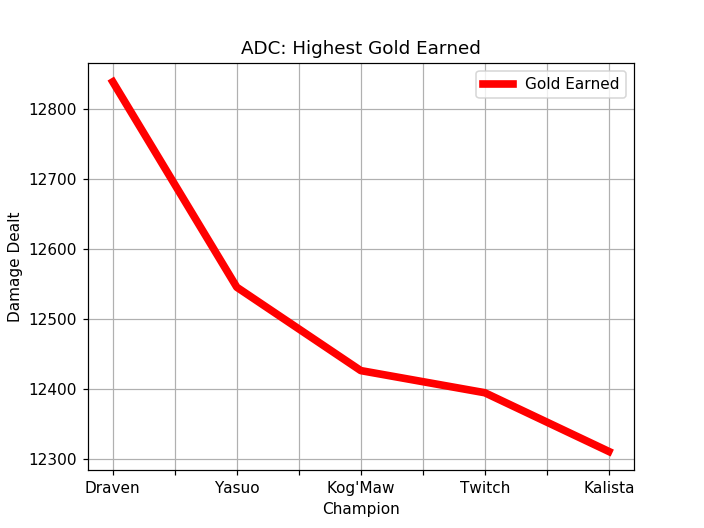

In [12]:
gold_df = gold_df.plot(color="red",linewidth=5)
gold_df.set_ylabel("Gold Earned")
plt.title("ADC: Highest Gold Earned")
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


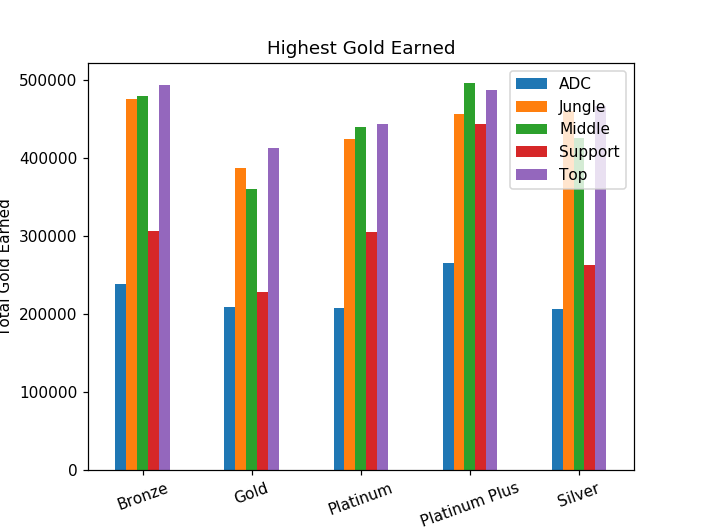

In [28]:
role_chart = clean_df.groupby(["League", "Role"]).sum()["Gold Earned"].unstack().plot(kind = "bar")
role_chart.set_ylabel("Total Gold Earned")
plt.title("Highest Gold Earned")
plt.xticks(rotation=20)
plt.legend(loc="best")
plt.show()

In [14]:
damage_taken = champ_grp.sort_values("Damage Taken",ascending=True)[["Damage Taken"]].head(5)
damage_taken

,Damage Taken
Champion,
Ziggs,16114.5
Varus,16875.4
Syndra,17093.0
Heimerdinger,17108.5
Veigar,17143.0


<IPython.core.display.Javascript object>


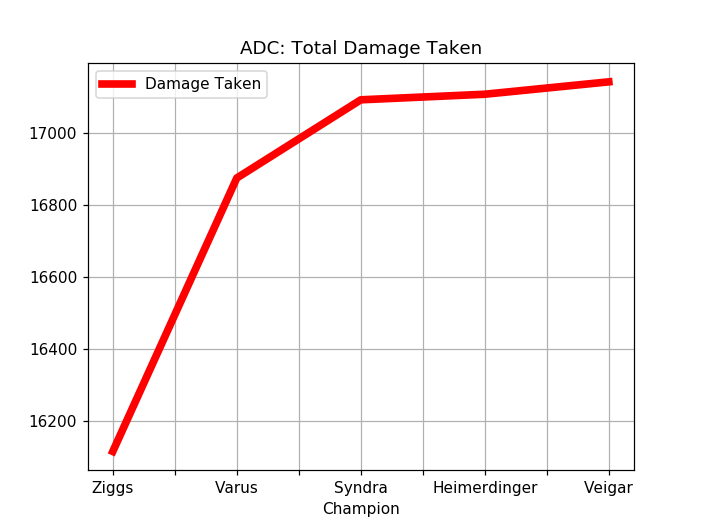

In [15]:
damage_taken_df = damage_taken.plot(color="red",linewidth=5)
gold_df.set_ylabel("Damage Taken")
plt.title("ADC: Total Damage Taken")
plt.grid()
plt.show()

In [16]:
damage_dealt = champ_grp.sort_values("Damage Dealt",ascending=False)[["Damage Dealt"]].head(5)
damage_dealt 

,Damage Dealt
Champion,
Ziggs,25139.0
Kog'Maw,25114.6
Heimerdinger,24412.5
Ezreal,22943.4
Twitch,22053.4


<IPython.core.display.Javascript object>


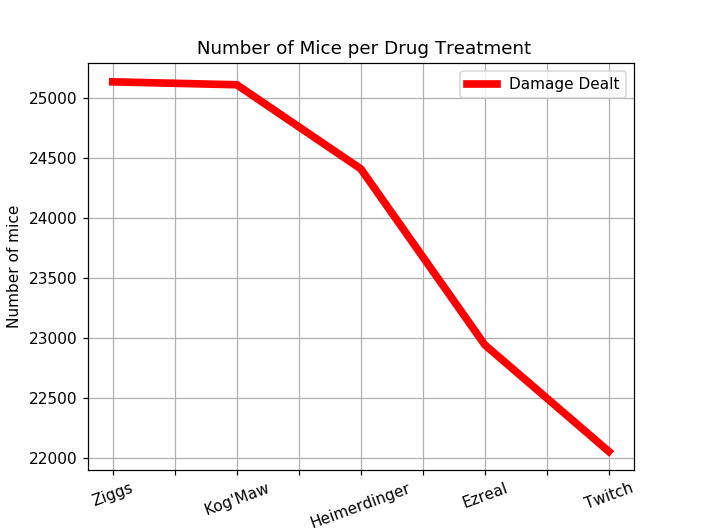

In [19]:
damage_dealt_df = damage_dealt.plot(color="red",linewidth=5)
gold_df.set_ylabel("Damage Dealt")
plt.title("ADC: Total Damage Dealt")
plt.grid()
plt.show()

In [17]:
champ_grp.max().to_frame()

,0
Gold Earned,12838.8
Damage Taken,22519.0
Damage Dealt,25139.0


In [18]:
champ_grp.min().to_frame()

,0
Gold Earned,11230.5
Damage Taken,16114.5
Damage Dealt,18700.8
